In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Data\\births.csv')
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


we have some null values in day column. Also due to null values the type of the day column is not integer. So we need first to replace the null values with a number and then change the type to integer

In [7]:
data['day'].fillna(0,inplace = True)
data['day'] = data['day'].astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15547 non-null  int64 
 1   month   15547 non-null  int64 
 2   day     15547 non-null  int32 
 3   gender  15547 non-null  object
 4   births  15547 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 546.7+ KB


We create a decade column to indicate which decade each baby was born. The ecay of the birth is 10 * (year//10)

In [10]:
data['decade'] = 10*(data['year']//10)
data.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [12]:
births = data.pivot_table('births', index='decade',columns='gender', aggfunc='sum')
births.head()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


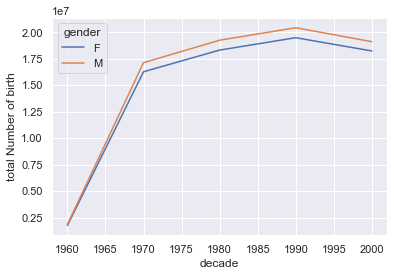

In [13]:
sns.set()
births.plot()
plt.ylabel('total Number of birth')
plt.show()

Lets now remove the outliers using sigma clipping :

#### Sigma Clipping
Suppose you have a set of data. Compute its median m and its standard deviation sigma. Keep only the data that falls in the range (m-a*sigma,m+a*sigma) for some value of a, and discard everything else. This is one iteration of sigma clipping. Continue to iterate a predetermined number of times, and/or stop when the relative reduction in the value of sigma is small.

Sigma clipping is geared toward removing outliers, to allow for a more robust (i.e. resistant to outliers) estimation of, say, the mean of the distribution. So it's applicable to data where you expect to find outliers

In [ ]:
quartiles = np.percentile(data['births'],[25,50,75])